In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

In [2]:
sns.set(font_scale=1.5)

In [3]:
# import the cleaned dataset
df = pd.read_csv(r"C:\Users\User\Desktop\House-Price-Prediction\input\resd_clean.csv")

# Preliminary Exploration

In [4]:
df.shape, df.columns

((192, 14),
 Index(['index', 'sub_area', 'n_bhk', 'surface', 'price', 'company_name',
        'township', 'club_house', 'school', 'hospital', 'mall', 'park', 'pool',
        'gym'],
       dtype='object'))

In [5]:
df.rename(columns={'township': 'society'}, inplace=True)

In [6]:
df["company_name"].unique(), df["society"].unique()

(array(['shapoorji paloonji', 'godrej properties', 'anp corp',
        'urban space creator', 'vtp reality', 'waghvani constructions',
        'sukwani associates', 'mantra properties', 'ravima ventures',
        'proviso group', 'unique properties', 'sagitarius ecospaces llp',
        'nirman developers', 'jhala group', 'shroff developers',
        'kundan spaces', 'venkatesh bhoomi construction', 'lush life',
        'maha anand pinnac associates', 'vasupujya corporation',
        'ace constructions', 'wellwisher apartments', 'dolphin group',
        'oxy buildcorp', 'kohinoor group', 'bhaktamar realities',
        'porwal & anand develkoper', 'porwal  develkoper',
        'keystone landmark', 'puraniks', 'majestique landmarks',
        'kalpataru', 'vijaya laxmi creations',
        'vijaya laxmi infrarealtors', 'calyx spaces', 'supreme',
        'tejraaj group'], dtype=object),
 array(['vanaha', 'godrej hills retreat', 'anp universe', 'urban skyline',
        'vtp cierra', 'vtp blue

In [7]:
# drop the columns because they have little correlation with target variable
df = df.drop(columns=["index", "company_name", "society"]).drop_duplicates()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sub_area    192 non-null    object 
 1   n_bhk       192 non-null    float64
 2   surface     192 non-null    float64
 3   price       192 non-null    float64
 4   club_house  192 non-null    object 
 5   school      192 non-null    object 
 6   hospital    192 non-null    object 
 7   mall        192 non-null    object 
 8   park        192 non-null    object 
 9   pool        192 non-null    object 
 10  gym         192 non-null    object 
dtypes: float64(3), object(8)
memory usage: 16.6+ KB


In [9]:
df.tail(10)

,sub_area,n_bhk,surface,price,club_house,school,hospital,mall,park,pool,gym
182,bavdhan,2.0,665.0,6.499,yes,no,no,no,yes,no,no
183,talegoan,1.0,280.0,1.319,yes,no,no,no,yes,yes,yes
184,talegoan,2.0,385.0,1.729,yes,no,no,no,yes,no,yes
185,baner,2.0,730.0,8.700,yes,no,no,no,yes,yes,yes
186,baner,3.0,1135.0,12.900,yes,no,no,no,yes,yes,yes
187,baner,3.0,1350.0,16.000,yes,no,no,no,yes,yes,yes
188,baner,4.0,1600.0,23.000,yes,no,no,no,yes,yes,yes
189,baner,2.0,789.0,9.500,no,no,no,no,yes,yes,yes
190,baner,3.0,1107.0,13.500,no,no,no,no,yes,yes,yes
191,baner,2.0,776.0,9.068,yes,no,no,no,yes,yes,yes


# Converting binary columns to dummy variables

In [10]:
binary_cols = df.iloc[:, 4:].columns.to_list()
binary_cols

['club_house', 'school', 'hospital', 'mall', 'park', 'pool', 'gym']

In [11]:
# average price for apartments with and without swimming pool
df[["price", "pool"]].groupby("pool")["price"].mean()

pool
no      6.455250
yes    10.039575
Name: price, dtype: float64

In [12]:
# Transforming the yes/no to 1/0
laben = LabelEncoder()
for col in binary_cols:
    df[col] = laben.fit_transform(df[col])

df.tail(10)

,sub_area,n_bhk,surface,price,club_house,school,hospital,mall,park,pool,gym
182,bavdhan,2.0,665.0,6.499,1,0,0,0,1,0,0
183,talegoan,1.0,280.0,1.319,1,0,0,0,1,1,1
184,talegoan,2.0,385.0,1.729,1,0,0,0,1,0,1
185,baner,2.0,730.0,8.700,1,0,0,0,1,1,1
186,baner,3.0,1135.0,12.900,1,0,0,0,1,1,1
187,baner,3.0,1350.0,16.000,1,0,0,0,1,1,1
188,baner,4.0,1600.0,23.000,1,0,0,0,1,1,1
189,baner,2.0,789.0,9.500,0,0,0,0,1,1,1
190,baner,3.0,1107.0,13.500,0,0,0,0,1,1,1
191,baner,2.0,776.0,9.068,1,0,0,0,1,1,1


# Sub areas contribution

In [13]:
df_sa_count = df.groupby("sub_area")["price"].count().reset_index().rename(
    columns={"price":"count"}).sort_values("count", ascending=False).reset_index(drop=True)
df_sa_count["sa_contribution"] = df_sa_count["count"]/len(df)
df_sa_count

,sub_area,count,sa_contribution
0,kharadi,16,0.083333
1,baner,12,0.062500
2,ravet,12,0.062500
3,bavdhan,10,0.052083
4,bt kawade rd,10,0.052083
5,handewadi,10,0.052083
6,wadgaon sheri,9,0.046875
7,hinjewadi,9,0.046875
8,mahalunge,9,0.046875
9,hadapsar,8,0.041667


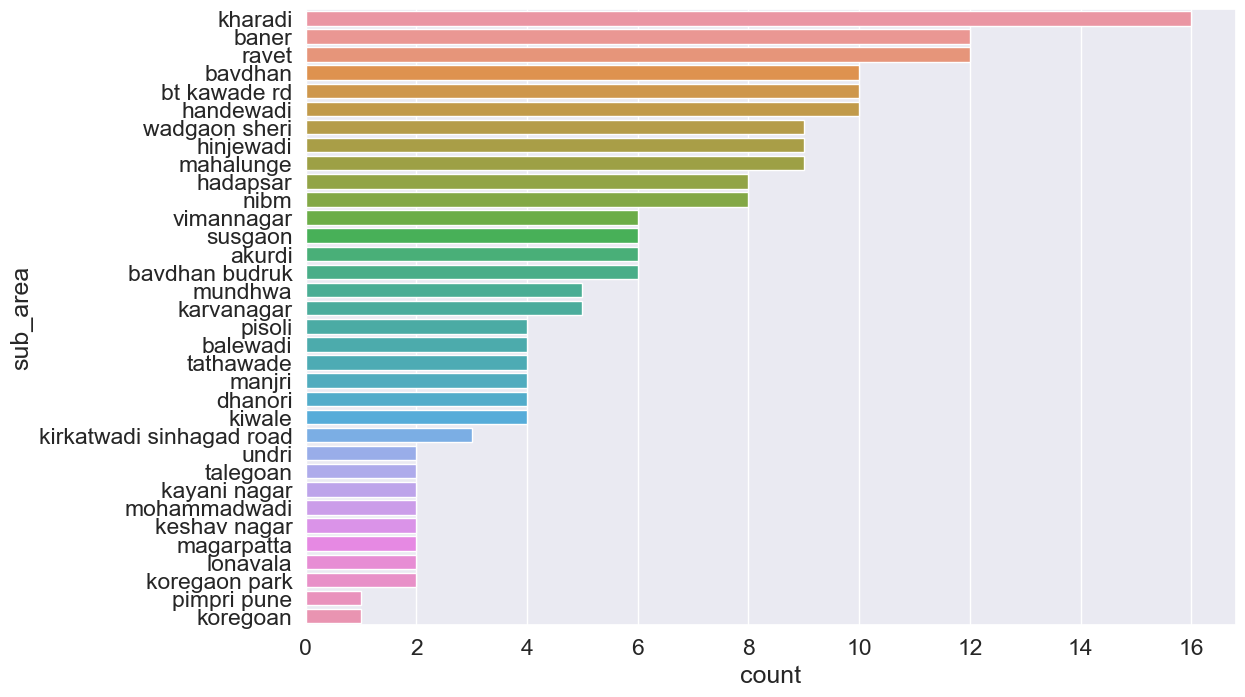

In [14]:
# Distribution of sub-areas contribution 
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(data=df_sa_count, x="count", y="sub_area", ax=ax)
plt.show()

In [15]:
len(df_sa_count), np.mean(df_sa_count["count"])

(34, 5.647058823529412)

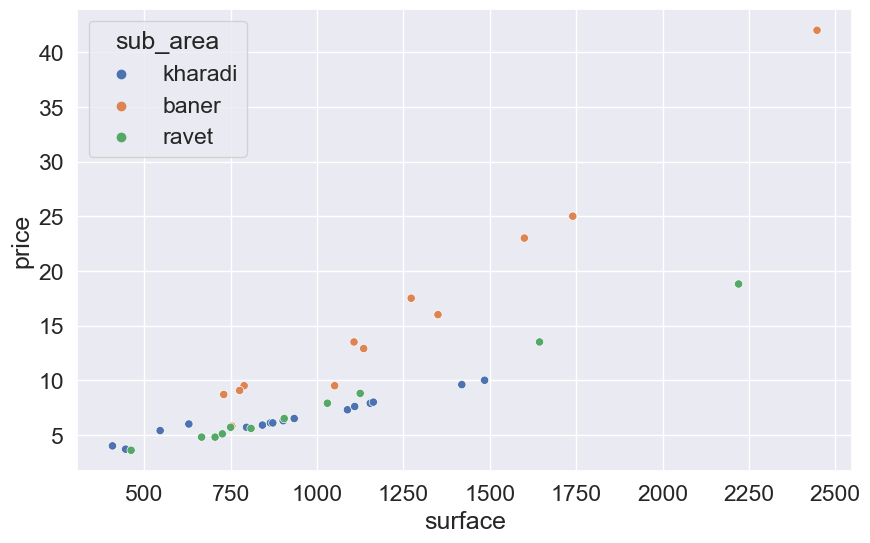

In [16]:
# Price vs surface for the first three most contribuions
fig, ax = plt.subplots(figsize=(10, 6))
df_plot = df_sa_count.merge( df[["sub_area", "surface", "price"]], on="sub_area")
df_plot = df_plot[df_plot["count"]>11]

sns.scatterplot(data=df_plot, x="surface", y="price", hue="sub_area")
plt.show()


In [17]:
# Feature engineering
sa_sel_col = df_sa_count.loc[df_sa_count["count"]>7, "sub_area"].to_list()
df["sub_area"] = df["sub_area"].where(df["sub_area"].isin(sa_sel_col), "other")

In [18]:
df["sub_area"].unique(), len(df["sub_area"].unique())

(array(['bavdhan', 'mahalunge', 'other', 'ravet', 'baner', 'kharadi',
        'hadapsar', 'handewadi', 'nibm', 'bt kawade rd', 'hinjewadi',
        'wadgaon sheri'], dtype=object),
 12)

# Converting Sub-Area to dummy variables

In [19]:
hoten = OneHotEncoder(sparse_output=False)
X_dummy = hoten.fit_transform(df[["sub_area"]])
X_dummy.shape, X_dummy, X_dummy.dtype

((192, 12),
 array([[0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]]),
 dtype('float64'))

In [20]:
X_dummy = X_dummy.astype("int64")

In [21]:
sa_cols_name = ["sa"+str(i+1) for i in range(X_dummy.shape[1])]
df.loc[:,sa_cols_name] = X_dummy
df.head()

,sub_area,n_bhk,surface,price,club_house,school,hospital,mall,park,pool,...,sa3,sa4,sa5,sa6,sa7,sa8,sa9,sa10,sa11,sa12
0,bavdhan,1.0,492.0,3.9,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,bavdhan,2.0,774.0,6.5,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,bavdhan,3.0,889.0,7.4,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,bavdhan,3.0,1018.0,8.9,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,mahalunge,2.0,743.0,7.4,1,1,1,1,1,1,...,0,0,0,0,0,1,0,0,0,0


In [22]:
df[["sub_area"]+sa_cols_name].drop_duplicates().sort_values("sub_area").reset_index(drop= True)

,sub_area,sa1,sa2,sa3,sa4,sa5,sa6,sa7,sa8,sa9,sa10,sa11,sa12
0,baner,1,0,0,0,0,0,0,0,0,0,0,0
1,bavdhan,0,1,0,0,0,0,0,0,0,0,0,0
2,bt kawade rd,0,0,1,0,0,0,0,0,0,0,0,0
3,hadapsar,0,0,0,1,0,0,0,0,0,0,0,0
4,handewadi,0,0,0,0,1,0,0,0,0,0,0,0
5,hinjewadi,0,0,0,0,0,1,0,0,0,0,0,0
6,kharadi,0,0,0,0,0,0,1,0,0,0,0,0
7,mahalunge,0,0,0,0,0,0,0,1,0,0,0,0
8,nibm,0,0,0,0,0,0,0,0,1,0,0,0
9,other,0,0,0,0,0,0,0,0,0,1,0,0


# Univariate and bivariate analysis

In [23]:
data = df.select_dtypes(exclude="object")

In [24]:
data.head()

,n_bhk,surface,price,club_house,school,hospital,mall,park,pool,gym,...,sa3,sa4,sa5,sa6,sa7,sa8,sa9,sa10,sa11,sa12
0,1.0,492.0,3.9,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2.0,774.0,6.5,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,3.0,889.0,7.4,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,3.0,1018.0,8.9,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,2.0,743.0,7.4,1,1,1,1,1,1,1,...,0,0,0,0,0,1,0,0,0,0


In [25]:
data.describe()

,n_bhk,surface,price,club_house,school,hospital,mall,park,pool,gym,...,sa3,sa4,sa5,sa6,sa7,sa8,sa9,sa10,sa11,sa12
count,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,...,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000
mean,2.458333,894.692708,8.695453,0.734375,0.031250,0.031250,0.031250,0.979167,0.625000,0.812500,...,0.052083,0.041667,0.052083,0.046875,0.083333,0.046875,0.041667,0.411458,0.062500,0.046875
std,1.197000,379.295902,5.850235,0.442820,0.174448,0.174448,0.174448,0.143200,0.485389,0.391333,...,0.222776,0.200349,0.222776,0.211924,0.277108,0.211924,0.200349,0.493384,0.242694,0.211924
min,0.000000,163.000000,1.319000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,670.000000,5.089000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,794.500000,7.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,1053.250000,9.746750,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,9.000000,2447.000000,46.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Continous variables

C:\Users\User\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


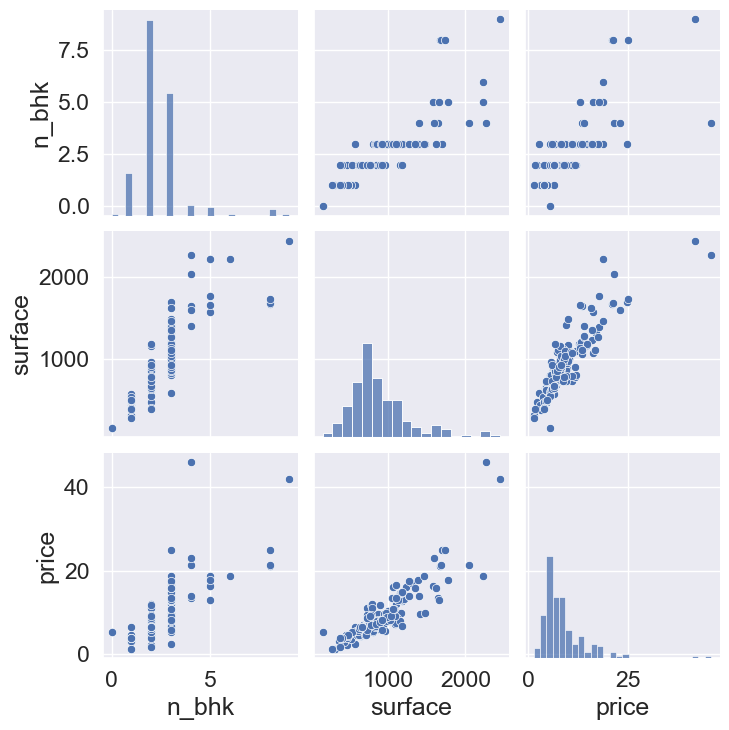

In [26]:
float_cols = data.select_dtypes( include="float" ).columns.to_list()
sns.pairplot( data[float_cols] )
plt.show()


# Binary Variables

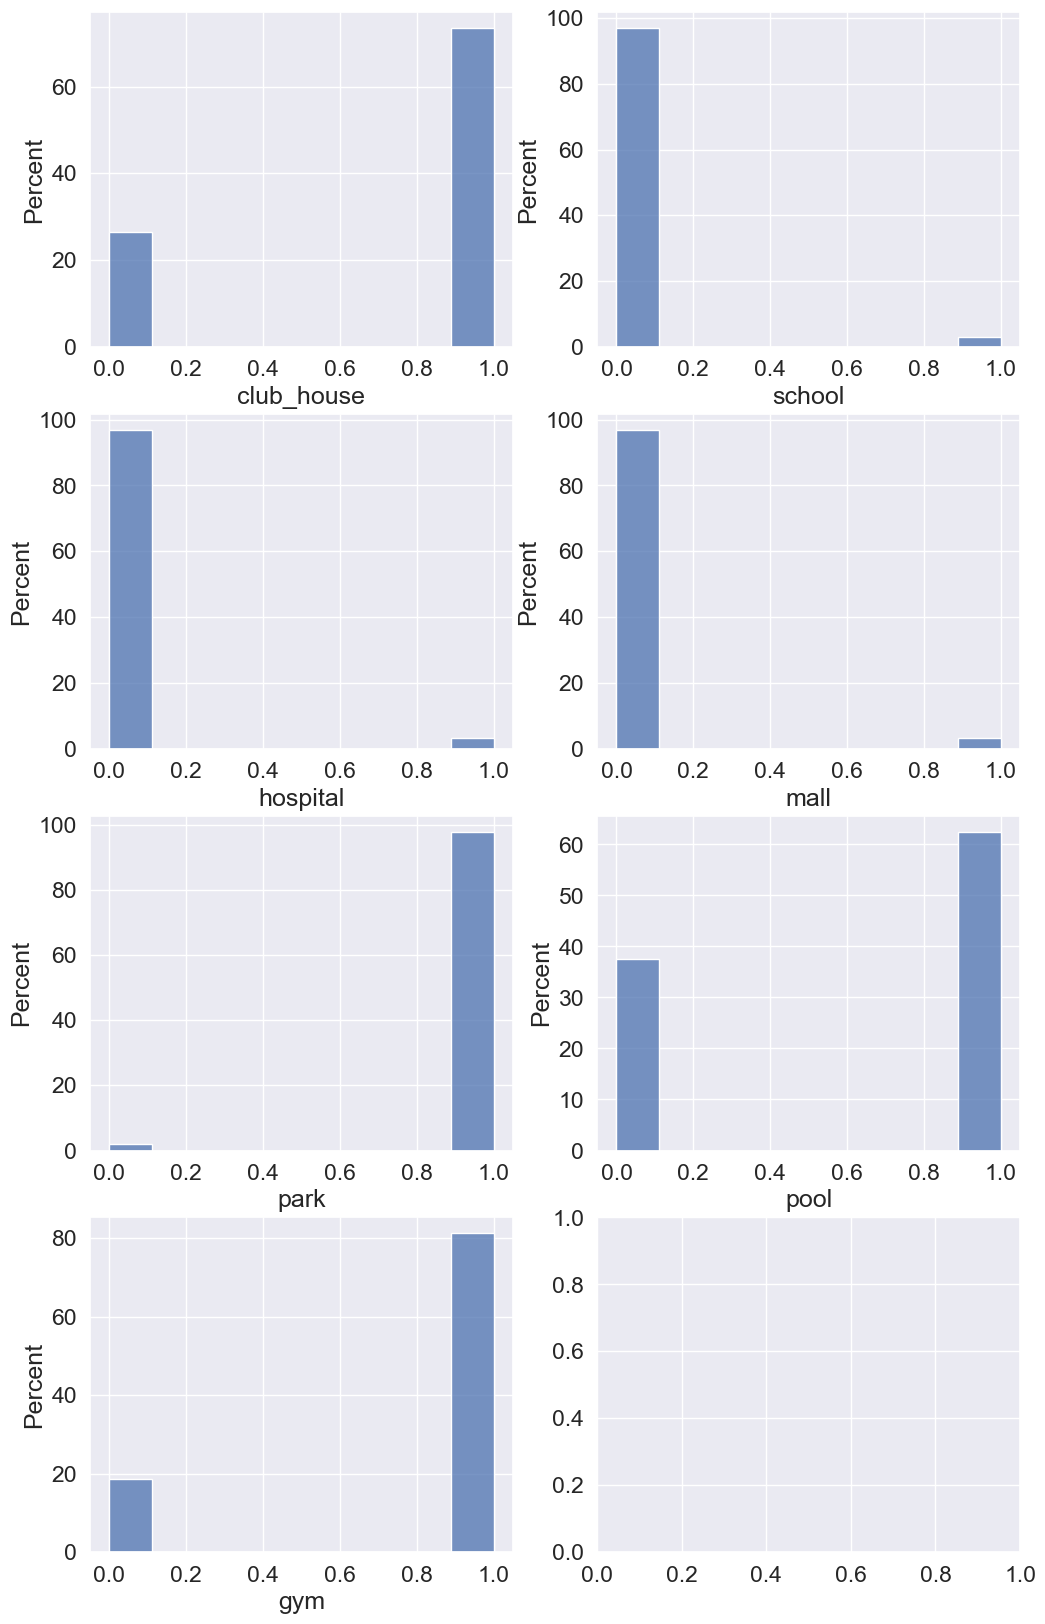

In [27]:
fig, ax = plt.subplots(4,2, figsize=(12,20))
for i, col in enumerate(binary_cols):
    sns.histplot(data, x=col, ax=ax[int(i/2), i%2], stat="percent")

# Correlation map

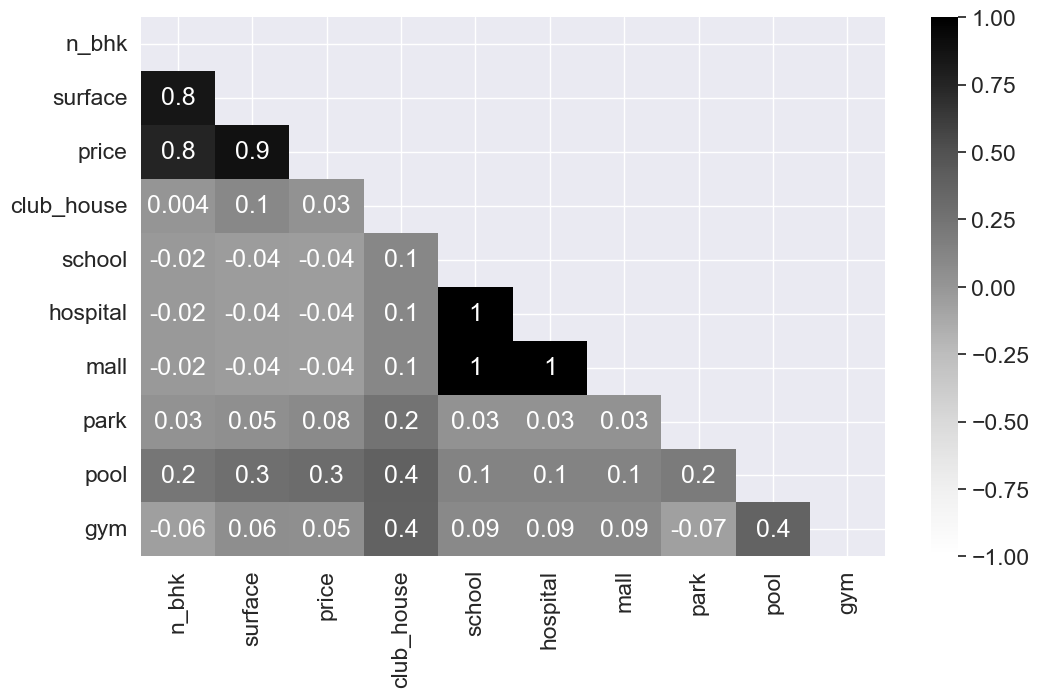

In [28]:
corr_cols_list = float_cols+binary_cols
correl = data[corr_cols_list].corr()
mask = np.zeros_like(correl )

mask[np.triu_indices_from(mask)] = True 

fig, ax = plt.subplots( figsize=(12,7) )
sns.heatmap(correl, mask=mask, vmin=-1, cmap='Greys', 
            annot=True, fmt='.1g')
plt.show()

# Feature selection

In [29]:
# Price correlation with all other columns
corr_cols_list.remove("price")
corr_cols_list.extend(sa_cols_name)
corr_list = [] # to keep the correlations with price
for col in corr_cols_list:
    corr_list.append( round(data["price"].corr(data[col]),2) )    

corr_list

[0.75,
 0.88,
 0.03,
 -0.04,
 -0.04,
 -0.04,
 0.08,
 0.3,
 0.05,
 0.32,
 -0.12,
 0.08,
 -0.04,
 -0.17,
 0.0,
 -0.11,
 -0.05,
 0.23,
 -0.03,
 -0.0,
 -0.07]

In [30]:
# Sorted correlations
df_corr = pd.DataFrame( data=zip(corr_cols_list, corr_list), 
                 columns=["col_name", "corr"] )\
            .sort_values("corr", ascending=False)\
            .reset_index(drop=True)
df_corr

,col_name,corr
0,surface,0.88
1,n_bhk,0.75
2,sa1,0.32
3,pool,0.30
4,sa9,0.23
5,sa3,0.08
6,park,0.08
7,gym,0.05
8,club_house,0.03
9,sa11,-0.00


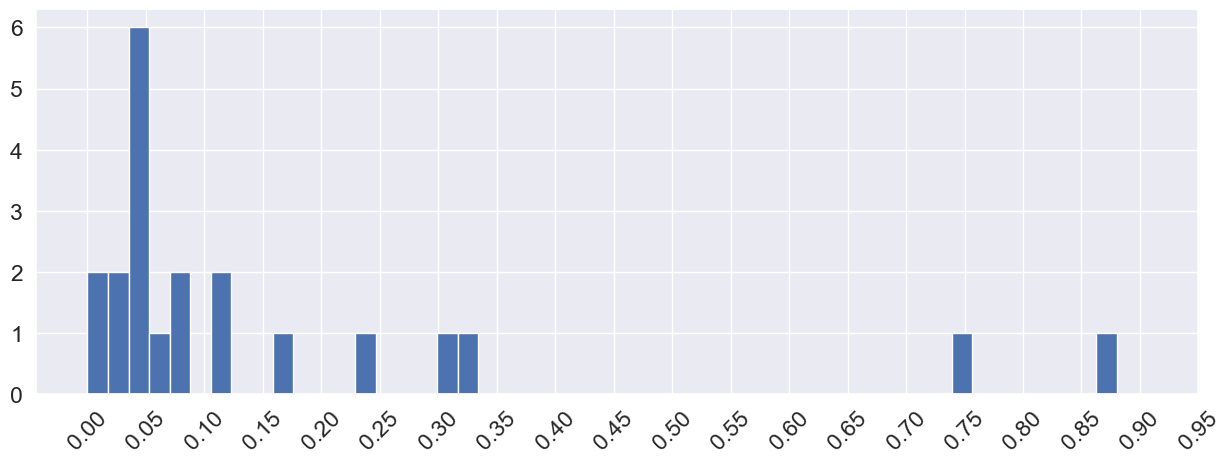

In [31]:
# Distribution of correlations with price 
fig, ax = plt.subplots(figsize=(15,5))
abs(df_corr["corr"]).hist(bins=50)
ax.set_xticks(np.arange(0, 1, 0.05))
plt.xticks(rotation=45)
plt.show()

In [32]:
features = df_corr.loc[abs(df_corr["corr"])>.1, "col_name"].to_list() 
features, len(features)

(['surface', 'n_bhk', 'sa1', 'pool', 'sa9', 'sa7', 'sa2', 'sa5'], 8)

In [33]:
# Keeping the sub areas' name, their mean price and frequency (count)
sa_feature_list = [sa for sa in features if "sa" in sa]
lst = []
for col in sa_feature_list:
    sa_triger = df[col]==1
    sa = df.loc[sa_triger, "sub_area"].to_list()[0]
    x = df.loc[sa_triger, "price"]
    lst.append( (sa, np.mean(x), df[col].sum()) )

lst


[('baner', 16.038999999999998, 12),
 ('nibm', 15.1, 8),
 ('kharadi', 6.6310625000000005, 16),
 ('bavdhan', 5.804400000000001, 10),
 ('handewadi', 4.4735000000000005, 10)]

In [34]:
# sub area mean price comparision 
sa_f = pd.DataFrame(lst, columns=["sub_area","mean_price", "count"])
sa_f["total_mean_price"] = np.mean(df["price"])
sa_f

,sub_area,mean_price,count,total_mean_price
0,baner,16.039000,12,8.695453
1,nibm,15.100000,8,8.695453
2,kharadi,6.631063,16,8.695453
3,bavdhan,5.804400,10,8.695453
4,handewadi,4.473500,10,8.695453


# Data scalling

In [35]:
sel_data = data[features+["price"]].copy()
sel_data.head()

,surface,n_bhk,sa1,pool,sa9,sa7,sa2,sa5,price
0,492.0,1.0,0,1,0,0,1,0,3.9
1,774.0,2.0,0,1,0,0,1,0,6.5
2,889.0,3.0,0,1,0,0,1,0,7.4
3,1018.0,3.0,0,1,0,0,1,0,8.9
4,743.0,2.0,0,1,0,0,0,0,7.4


In [36]:
sc = StandardScaler(with_std = True, with_mean=True)
sel_data["surface"] = sc.fit_transform(sel_data[["surface"]])

In [37]:
sel_data

,surface,n_bhk,sa1,pool,sa9,sa7,sa2,sa5,price
0,-1.064460,1.0,0,1,0,0,1,0,3.900
1,-0.319034,2.0,0,1,0,0,1,0,6.500
2,-0.015048,3.0,0,1,0,0,1,0,7.400
3,0.325945,3.0,0,1,0,0,1,0,8.900
4,-0.400978,2.0,0,1,0,0,0,0,7.400
...,...,...,...,...,...,...,...,...,...
187,1.203540,3.0,1,1,0,0,0,0,16.000
188,1.864379,4.0,1,1,0,0,0,0,23.000
189,-0.279384,2.0,1,1,0,0,0,0,9.500
190,0.561204,3.0,1,1,0,0,0,0,13.500


In [39]:
sel_data.to_csv("resd_features.csv", index=False)